<font size=5><center><b>Heart Disease Risk Prediction</b></center></font>


<img src="heart-attack-concept.jpg" alt="Heart Disease" width="500" height="500">

## A. About dataset

Columns names:

1. General_Health:
    It is a categorical variable.
    It has 5 unique values.
2. Exercise:
    It is a categorical variable.
    It has 2 unique values.
3. Depression:
    It is a categorical variable.
    It has 2 unique values.
4. Diabetes:
    It is a categorical variable.
    It has 2 unique values.
5. Sex:
    It is a categorical variable.
    It has 2 unique values.
6. Age_Category:
    It is a categorical variable.
    It has 13 unique values.
7. Weight_(kg):
    It is a numerical variable.
    It has 173 unique values.
8. BMI:
    It is a numerical variable.
    It has 544 unique values.
9. Smoking_History:
    It is a categorical variable.
    It has 2 unique values.
10. Alcohol_Consumption:
    It is a categorical variable.
    It has 2 unique values.
11. Heart_Disease:
    It is a categorical variable.
    It has 2 unique values.
    It is our target variable.

## Business Scope

The business scope for the Heart Diseases Risk Prediction Dataset involves developing a robust machine learning model to accurately predict an individual's risk of cardiovascular diseases based on relevant health parameters. The primary objectives include creating a predictive system that can stratify individuals into different risk categories, enabling early intervention and personalized recommendations for risk mitigation. The application of this predictive model aims to optimize healthcare resource allocation, improve overall health outcomes, and contribute to preventive healthcare efforts.This initiative aims to improve public health outcomes by facilitating timely interventions, promoting healthier lifestyle choices, and contributing to the efficient allocation of healthcare resources.The success of the project will be measured by the model's accuracy, precision, recall, and its ability to positively impact public health by identifying and addressing cardiovascular disease risks efficiently.

## B. Data Cleaning and Preprocessing:

## Preprocessing Techniques

- The dataset used for the preprocessing is the Heart Disease Prediction Dataset.
- Starting with importing libraries
- Identifying the features and target variable
- Separating features and target
- Checking for missing values
- Checking for unique values
- Label encoding categorical data
- One hot encoding remaining categorical data
- Splitting data
- Feature scaling

In [1]:
import pandas as pd
import numpy as np

data= pd.read_csv('heart.csv')
data.head()


,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Heart_Disease
0,Poor,No,No,No,Female,70-74,32.66,14.54,Yes,No,No
1,Very Good,No,No,Yes,Female,70-74,77.11,28.29,No,No,Yes
2,Very Good,Yes,No,Yes,Female,60-64,88.45,33.47,No,No,No
3,Poor,Yes,No,Yes,Male,75-79,93.44,28.73,No,Yes,Yes
4,Good,No,No,No,Male,80+,88.45,24.37,Yes,Yes,No


In [2]:
#types of data
data.dtypes

General_Health          object
Exercise                object
Depression              object
Diabetes                object
Sex                     object
Age_Category            object
Weight_(kg)            float64
BMI                    float64
Smoking_History         object
Alcohol_Consumption     object
Heart_Disease           object
dtype: object

In [3]:
#X independent variable
X=data.iloc[:,:-1]
X

,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption
0,Poor,No,No,No,Female,70-74,32.66,14.54,Yes,No
1,Very Good,No,No,Yes,Female,70-74,77.11,28.29,No,No
2,Very Good,Yes,No,Yes,Female,60-64,88.45,33.47,No,No
3,Poor,Yes,No,Yes,Male,75-79,93.44,28.73,No,Yes
4,Good,No,No,No,Male,80+,88.45,24.37,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
994,Very Good,No,Yes,No,Female,18-24,47.63,18.02,No,Yes
995,Excellent,Yes,No,No,Female,45-49,81.65,26.58,Yes,Yes
996,Very Good,No,Yes,No,Male,40-44,97.52,31.75,No,No
997,Good,Yes,No,No,Male,55-59,104.33,28.75,Yes,Yes


In [4]:
#y dependent variable
y=data.iloc[:,-1]
y

0       No
1      Yes
2       No
3      Yes
4       No
      ... 
994     No
995     No
996     No
997     No
998     No
Name: Heart_Disease, Length: 999, dtype: object

In [5]:
#check for missing values
data.isnull().sum()

General_Health         0
Exercise               0
Depression             0
Diabetes               0
Sex                    0
Age_Category           0
Weight_(kg)            0
BMI                    0
Smoking_History        0
Alcohol_Consumption    0
Heart_Disease          0
dtype: int64

In [6]:
#unique value in each column
data.nunique()

General_Health           5
Exercise                 2
Depression               2
Diabetes                 2
Sex                      2
Age_Category            13
Weight_(kg)            173
BMI                    544
Smoking_History          2
Alcohol_Consumption      2
Heart_Disease            2
dtype: int64

In [7]:
data.describe()

,Weight_(kg),BMI
count,999.000000,999.00000
mean,80.999409,28.56035
std,19.803497,6.22184
min,32.660000,14.06000
25%,67.590000,24.21000
50%,79.380000,27.78000
75%,91.170000,31.89000
max,167.830000,51.81000


### Interquartile Range (IQR) 

Interquartile Range (IQR) is a measure of statistical dispersion and is used to describe the middle 50% of values in a dataset. It is defined as the difference between the third quartile (Q3) and the first quartile (Q1), where:

- Q1 (First Quartile): The 25th percentile of the data. This is the value below which 25% of the data falls.
- Q3 (Third Quartile): The 75th percentile of the data. This is the value below which 75% of the data falls.
- The formula for the IQR is:IQR = 𝑄3 − 𝑄1


#### Using IQR to Detect Outliers

Outliers are values that are significantly higher or lower than the rest of the data. They can be detected using the IQR by defining a threshold beyond which values are considered outliers. The common thresholds are:

- Lower Bound: 𝑄1−1.5×IQR 
- Upper Bound: Q3+1.5×IQR

Values below the lower bound or above the upper bound are considered outliers.

In [8]:
# Detect and Address Outliers (using IQR)
Q1 = data[['Weight_(kg)', 'BMI']].quantile(0.25)
Q3 = data[['Weight_(kg)', 'BMI']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[['Weight_(kg)', 'BMI']] < (Q1 - 1.5 * IQR)) | (data[['Weight_(kg)', 'BMI']] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nOutliers:")
print(outliers)


Outliers:
0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool


In [9]:
#encoding categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['Sex'] = labelencoder.fit_transform(X['Sex'])
X['Exercise'] = labelencoder.fit_transform(X['Exercise'])
X['Depression'] = labelencoder.fit_transform(X['Depression'])
X['Diabetes'] = labelencoder.fit_transform(X['Diabetes'])
X['Smoking_History'] = labelencoder.fit_transform(X['Smoking_History'])
X['Age_Category'] = labelencoder.fit_transform(X['Age_Category'])
X['Alcohol_Consumption'] = labelencoder.fit_transform(X['Alcohol_Consumption'])
y = labelencoder.fit_transform(y)

X

,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption
0,Poor,0,0,0,0,10,32.66,14.54,1,0
1,Very Good,0,0,1,0,10,77.11,28.29,0,0
2,Very Good,1,0,1,0,8,88.45,33.47,0,0
3,Poor,1,0,1,1,11,93.44,28.73,0,1
4,Good,0,0,0,1,12,88.45,24.37,1,1
...,...,...,...,...,...,...,...,...,...,...
994,Very Good,0,1,0,0,0,47.63,18.02,0,1
995,Excellent,1,0,0,0,5,81.65,26.58,1,1
996,Very Good,0,1,0,1,4,97.52,31.75,0,0
997,Good,1,0,0,1,7,104.33,28.75,1,1


In [10]:
pd.DataFrame(y)

,0
0,0
1,1
2,0
3,1
4,0
...,...
994,0
995,0
996,0
997,0


In [11]:
#one hot encoding remaining categorical data

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('General_Health', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,32.66,14.54,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,77.11,28.29,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,8.0,88.45,33.47,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,11.0,93.44,28.73,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,88.45,24.37,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,47.63,18.02,0.0,1.0
995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,81.65,26.58,1.0,1.0
996,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,97.52,31.75,0.0,0.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,104.33,28.75,1.0,1.0


In [12]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
df=pd.DataFrame(X_train)
df



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.342757,-0.539251,1.380382,-0.274536,-0.585540,-1.179922,-0.454916,1.658666,1.481891,-0.739293,-1.026118,-1.384775,-0.800411,0.928693
1,-0.342757,1.854424,-0.724437,-0.274536,-0.585540,0.847514,2.198208,-0.602894,-0.674814,-1.484650,-0.686646,0.074138,1.249359,0.928693
2,-0.342757,-0.539251,1.380382,-0.274536,-0.585540,0.847514,2.198208,-0.602894,-0.674814,-1.484650,-1.251933,-0.687305,1.249359,0.928693
3,-0.342757,1.854424,-0.724437,-0.274536,-0.585540,0.847514,2.198208,-0.602894,-0.674814,-0.366615,0.172749,0.237974,1.249359,0.928693
4,2.917517,-0.539251,-0.724437,-0.274536,-0.585540,0.847514,-0.454916,-0.602894,1.481891,-3.348042,-0.551057,-0.794968,-0.800411,0.928693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,-0.342757,1.854424,-0.724437,-0.274536,-0.585540,0.847514,-0.454916,1.658666,-0.674814,-2.602685,-0.008202,0.177120,-0.800411,-1.076782
795,-0.342757,-0.539251,1.380382,-0.274536,-0.585540,0.847514,2.198208,-0.602894,-0.674814,-1.484650,-0.008202,-0.097498,1.249359,-1.076782
796,-0.342757,-0.539251,-0.724437,-0.274536,1.707825,0.847514,-0.454916,-0.602894,1.481891,-1.857328,1.506707,0.195844,-0.800411,0.928693
797,-0.342757,-0.539251,1.380382,-0.274536,-0.585540,0.847514,-0.454916,-0.602894,-0.674814,1.124099,-1.026118,-0.381479,1.249359,0.928693


In [14]:
X_test = sc.transform(X_test)

df = pd.DataFrame(X_test)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.342757,1.854424,-0.724437,-0.274536,-0.585540,-1.179922,-0.454916,-0.602894,-0.674814,1.124099,0.420997,0.515713,-0.800411,-1.076782
1,-0.342757,-0.539251,1.380382,-0.274536,-0.585540,0.847514,-0.454916,-0.602894,-0.674814,0.378742,-1.478247,-1.317680,-0.800411,0.928693
2,-0.342757,-0.539251,-0.724437,-0.274536,1.707825,0.847514,-0.454916,-0.602894,-0.674814,0.751420,-0.189154,-0.415807,1.249359,-1.076782
3,-0.342757,-0.539251,-0.724437,-0.274536,1.707825,0.847514,-0.454916,-0.602894,1.481891,0.006064,0.104456,-0.581202,-0.800411,-1.076782
4,-0.342757,1.854424,-0.724437,-0.274536,-0.585540,-1.179922,2.198208,1.658666,-0.674814,0.006064,0.443928,0.696712,-0.800411,0.928693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.917517,-0.539251,-0.724437,-0.274536,-0.585540,0.847514,-0.454916,-0.602894,-0.674814,1.124099,-1.659199,-1.717126,-0.800411,-1.076782
196,-0.342757,-0.539251,-0.724437,-0.274536,1.707825,0.847514,-0.454916,-0.602894,-0.674814,0.378742,-1.206571,-1.297396,1.249359,-1.076782
197,-0.342757,-0.539251,1.380382,-0.274536,-0.585540,0.847514,-0.454916,-0.602894,-0.674814,0.006064,-0.641284,-0.993131,1.249359,-1.076782
198,-0.342757,-0.539251,-0.724437,-0.274536,1.707825,0.847514,-0.454916,-0.602894,1.481891,1.124099,-0.460831,-0.699788,-0.800411,0.928693


## C. Exploratory Data Analysis (EDA):

### 1. Central Tendency

Calculate the measures of central tendency (mean, median, mode) for numerical columns (Weight_(kg), BMI).

In [15]:
#Central Tendency
# Mean
mean_weight = data['Weight_(kg)'].mean()
mean_bmi = data['BMI'].mean()

# Median
median_weight = data['Weight_(kg)'].median()
median_bmi = data['BMI'].median()

# Mode
mode_weight = data['Weight_(kg)'].mode()[0]
mode_bmi = data['BMI'].mode()[0]

print(f"Mean Weight: {mean_weight} , Mean BMI: {mean_bmi}")
print(f"Median Weight: {median_weight}, Median BMI: {median_bmi}")
print(f"Mode Weight: {mode_weight}, Mode BMI: {mode_bmi}")


Mean Weight: 80.99940940940941 , Mean BMI: 28.56035035035035
Median Weight: 79.38, Median BMI: 27.78
Mode Weight: 81.65, Mode BMI: 27.46


### 2. Dispersion
Calculate the measures of dispersion (range, variance, standard deviation, interquartile range) for numerical columns.

In [16]:
# Range
range_weight = data['Weight_(kg)'].max() - data['Weight_(kg)'].min()
range_bmi = data['BMI'].max() - data['BMI'].min()

# Variance
variance_weight = data['Weight_(kg)'].var()
variance_bmi = data['BMI'].var()

# Standard Deviation
std_dev_weight = data['Weight_(kg)'].std()
std_dev_bmi = data['BMI'].std()

# Interquartile Range (IQR)
Q1 = data[['Weight_(kg)', 'BMI']].quantile(0.25)
Q3 = data[['Weight_(kg)', 'BMI']].quantile(0.75)
IQR_weight = Q3['Weight_(kg)'] - Q1['Weight_(kg)']
IQR_bmi = Q3['BMI'] - Q1['BMI']

print(f"Range of Weight: {range_weight}, Range of BMI: {range_bmi}")
print(f"Variance of Weight: {variance_weight}, Variance of BMI: {variance_bmi}")
print(f"Standard Deviation of Weight: {std_dev_weight}, Standard Deviation of BMI: {std_dev_bmi}")
print(f"IQR of Weight: {IQR_weight}, IQR of BMI: {IQR_bmi}")


Range of Weight: 135.17000000000002, Range of BMI: 37.75
Variance of Weight: 392.17847610375907, Variance of BMI: 38.711298374125626
Standard Deviation of Weight: 19.803496562570942, Standard Deviation of BMI: 6.221840433033109
IQR of Weight: 23.58, IQR of BMI: 7.68


### 3. Correlation
Calculate the correlation matrix for numerical columns to see the relationships between them.



In [17]:
# Correlation Matrix
correlation_matrix = data[['Weight_(kg)', 'BMI']].corr()

print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,Weight_(kg),BMI
Weight_(kg),1.000000,0.856671
BMI,0.856671,1.000000


In [18]:
# Advanced Grouping and Aggregation
grouped_df = data.groupby('Age_Category').agg({'Weight_(kg)': 'mean', 'BMI': 'mean'})
grouped_df

,Weight_(kg),BMI
Age_Category,,
18-24,73.157143,25.155714
25-29,71.818333,22.733333
30-34,90.354667,30.741333
35-39,81.335789,28.856842
40-44,91.663750,31.227500
45-49,87.089429,30.088571
50-54,91.308000,33.064333
55-59,85.330769,29.648615
60-64,84.871811,29.949291


In [19]:
# Group by 'General_Health' and 'Sex' and calculate the mean of 'Weight_(kg)' and 'BMI'
grouped_data = data.groupby(['General_Health', 'Sex'])[['Weight_(kg)', 'BMI']].mean()

print("Mean Weight and BMI grouped by General Health and Sex:")
grouped_data

Mean Weight and BMI grouped by General Health and Sex:


Weight_(kg)        BMI
General_Health Sex                           
Excellent      Female    71.623056  26.957222
               Male      84.303714  26.724571
Fair           Female    79.461438  29.737778
               Male      92.243448  28.473793
Good           Female    76.843348  28.696295
               Male      91.590345  28.502672
Poor           Female    80.331400  30.596200
               Male      96.058182  29.617273
Very Good      Female    73.310319  27.568564
               Male      93.254568  29.081358

In [20]:
# Group by 'General_Health' and 'Sex' and calculate the median of 'Weight_(kg)' and 'BMI'
grouped_data_median = data.groupby(['General_Health', 'Sex'])[['Weight_(kg)', 'BMI']].median()

print("Median Weight and BMI grouped by General Health and Sex:")
grouped_data_median


Median Weight and BMI grouped by General Health and Sex:


Weight_(kg)     BMI
General_Health Sex                        
Excellent      Female        68.04  25.825
               Male          83.01  26.830
Fair           Female        77.11  29.290
               Male          90.72  27.800
Good           Female        76.20  28.220
               Male          90.72  28.160
Poor           Female        79.38  29.865
               Male          97.52  30.005
Very Good      Female        70.31  26.620
               Male          88.45  27.980

In [21]:
# Group by 'General_Health' and 'Sex' and calculate multiple aggregations for 'Weight_(kg)' and 'BMI'
grouped_data_agg = data.groupby(['General_Health', 'Sex']).agg({
    'Weight_(kg)': ['mean', 'median', 'std'],
    'BMI': ['mean', 'median', 'std']
})

print("Multiple Aggregations for Weight and BMI grouped by General Health and Sex:")
grouped_data_agg


Multiple Aggregations for Weight and BMI grouped by General Health and Sex:


Weight_(kg)                          BMI          \
                             mean median        std       mean  median   
General_Health Sex                                                       
Excellent      Female   71.623056  68.04  18.703746  26.957222  25.825   
               Male     84.303714  83.01  11.907759  26.724571  26.830   
Fair           Female   79.461438  77.11  21.320453  29.737778  29.290   
               Male     92.243448  90.72  20.464850  28.473793  27.800   
Good           Female   76.843348  76.20  16.302479  28.696295  28.220   
               Male     91.590345  90.72  18.126420  28.502672  28.160   
Poor           Female   80.331400  79.38  20.288588  30.596200  29.865   
               Male     96.058182  97.52  23.820982  29.617273  30.005   
Very Good      Female   73.310319  70.31  16.745292  27.568564  26.620   
               Male     93.254568  88.45  18.579889  29.081358  27.980   

                                 
                            std  
General_Health Sex               
Excellent      Female  7.089727  
               Male    3.556180  
Fair           Female  7.566464  
               Male    5.881278  
Good           Female  5.888983  
               Male    4.978495  
Poor           Female  7.726025  
               Male    6.951980  
Very Good      Female  5.793429  
               Male    5.246793

In [22]:
# Group by 'Age_Category' and 'Exercise' and count the number of 'Heart_Disease' cases
grouped_data_count = data.groupby(['Age_Category', 'Exercise'])['Heart_Disease'].count().reset_index()

print("Count of Heart Disease cases grouped by Age Category and Exercise:")
grouped_data_count


Count of Heart Disease cases grouped by Age Category and Exercise:


,Age_Category,Exercise,Heart_Disease
0,18-24,No,4
1,18-24,Yes,10
2,25-29,No,2
3,25-29,Yes,4
4,30-34,Yes,15
5,35-39,No,4
6,35-39,Yes,15
7,40-44,No,6
8,40-44,Yes,18
9,45-49,No,13


### Pivot Table

A pivot table is a data summarization tool commonly used in data analysis to aggregate, summarize, and analyze data from a larger dataset. It allows you to reorganize and manipulate data to provide meaningful insights without altering the original dataset.

#### Key Features of Pivot Tables:

**1.Aggregation:**

           You can aggregate data using various functions such as sum, mean, count, min, max, etc.
           For example, you can calculate the average weight or the total count of heart disease cases.

**2.Categorization:**

           You can categorize data based on one or more fields (columns).
           For example, you can group data by General_Health and Sex.

**3.Flexibility:**

           Pivot tables allow you to dynamically adjust the way data is displayed, enabling you to view data from different                           perspectives.
           For example, You can easily rearrange rows, columns, and values to explore different aspects of the data.

**4.Filtering:**

           You can filter data within the pivot table to focus on specific subsets of the dataset.
           For example, you can filter to show only certain age categories or exercise levels.

In [23]:
# Pivot table showing the mean 'Weight_(kg)' and 'BMI' for each 'General_Health' and 'Sex'
pivot_table = data.pivot_table(values=['Weight_(kg)', 'BMI'], 
                               index=['General_Health'], 
                               columns=['Sex'], 
                               aggfunc='mean')
print("Pivot Table of Mean Weight and BMI grouped by General Health and Sex:")
pivot_table


Pivot Table of Mean Weight and BMI grouped by General Health and Sex:


BMI            Weight_(kg)           
Sex                Female       Male      Female       Male
General_Health                                             
Excellent       26.957222  26.724571   71.623056  84.303714
Fair            29.737778  28.473793   79.461438  92.243448
Good            28.696295  28.502672   76.843348  91.590345
Poor            30.596200  29.617273   80.331400  96.058182
Very Good       27.568564  29.081358   73.310319  93.254568

In [24]:
# Descriptive Statistics
summary_stats = data.describe()

summary_stats

,Weight_(kg),BMI
count,999.000000,999.00000
mean,80.999409,28.56035
std,19.803497,6.22184
min,32.660000,14.06000
25%,67.590000,24.21000
50%,79.380000,27.78000
75%,91.170000,31.89000
max,167.830000,51.81000


## D. Data Visualization:

Data Visualization adds a lot of information to the dataset. Making a data visualization helps to understand the data better.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Pie Chart
Pie chart showing the distribution of General Health

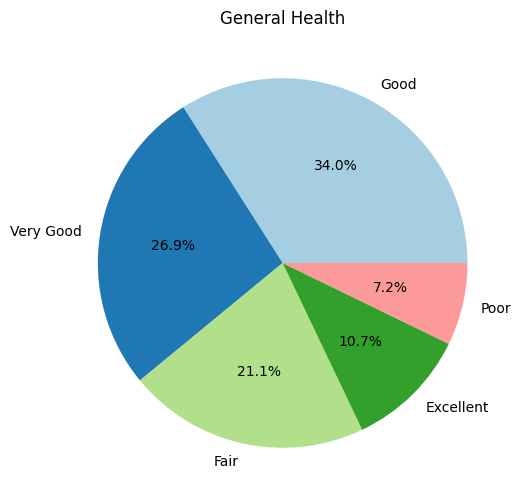

In [26]:
# Pie chart for General_Health
plt.figure(figsize=(6, 6))
data['General_Health'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('General Health')
plt.ylabel('')
plt.show()


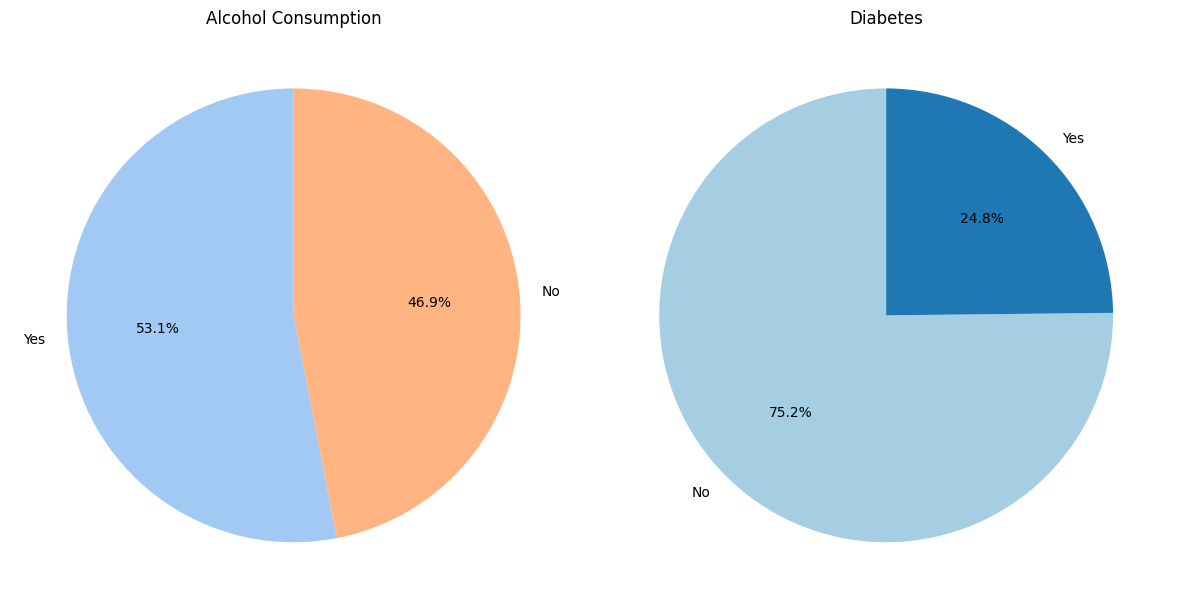

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Alcohol Consumption
data['Alcohol_Consumption'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[0],
    startangle=90,
    colors=sns.color_palette('pastel')
)
axes[0].set_title('Alcohol Consumption')
axes[0].set_ylabel('')

# Pie chart for Diabetes
data['Diabetes'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[1],
    startangle=90,
    colors=sns.color_palette('Paired')
)
axes[1].set_title('Diabetes')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


#### Histogram
Here we can see the distribution of weight in the dataset.

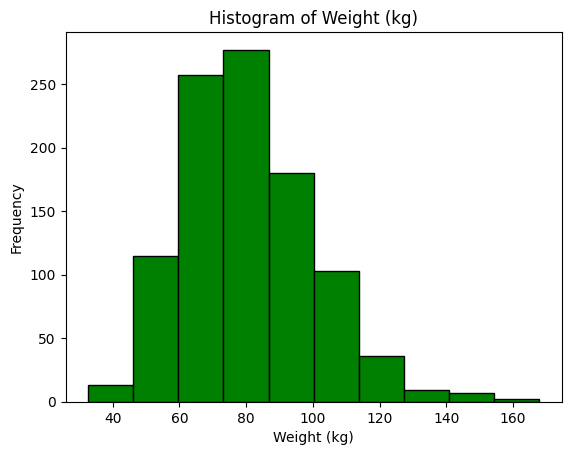

In [28]:
# Histogram
plt.hist(data['Weight_(kg)'],color='green', edgecolor='black', bins=10)
plt.title('Histogram of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

#### Box Plot
Box plot shows the distribution of data in terms of their quartiles, median, and outliers.Here we are plotting weight against general health.Showing the relationship between weight and general health.As shown there are some outliers in the data.

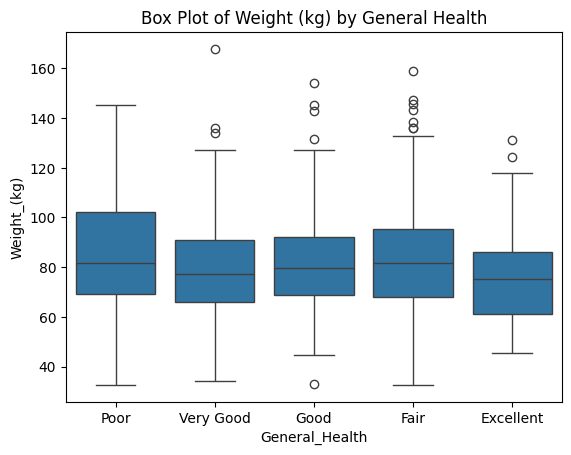

In [29]:
# Box Plot
sns.boxplot(x=data['General_Health'], y=data['Weight_(kg)'])
plt.title('Box Plot of Weight (kg) by General Health')
plt.show()


#### Scatter Plot
Scatter plot is used to visualize the relationship between two numerical variables weight and BMI.

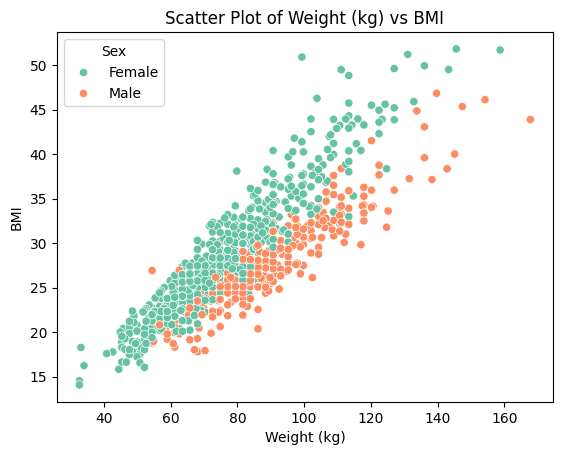

In [30]:
# Scatter Plot
sns.scatterplot(x='Weight_(kg)', y='BMI', data=data, hue='Sex', palette='Set2')
plt.title('Scatter Plot of Weight (kg) vs BMI')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.show()


#### Count Plot
count plot is used to show the count of each category in a categorical variable.

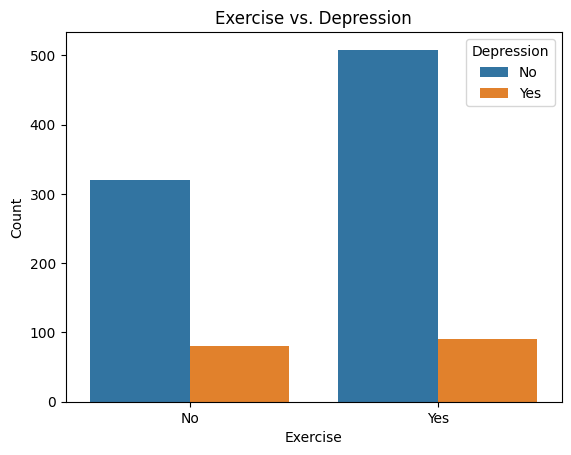

In [31]:
# Count Plot for 'Exercise' and 'Depression'
sns.countplot(data=data, x='Exercise', hue='Depression')
plt.title('Exercise vs. Depression')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()


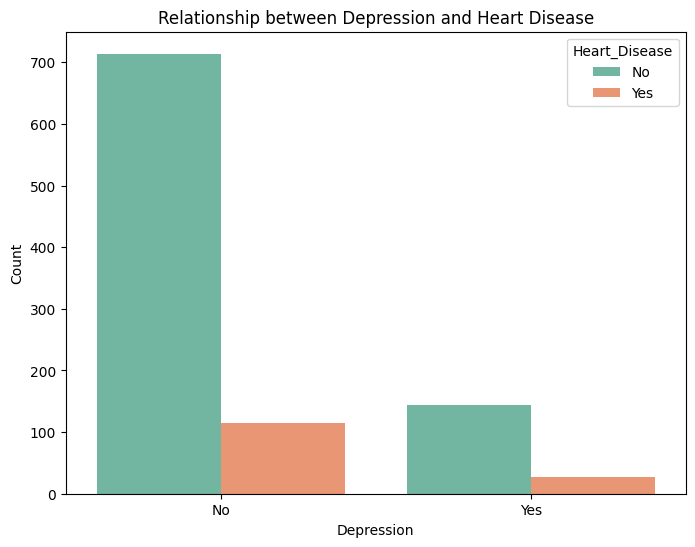

In [32]:
# Count Plot for 'Depression' and 'Heart_Disease'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Depression', hue='Heart_Disease', palette='Set2')
plt.title('Relationship between Depression and Heart Disease')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()


#### Pair Plot
pair plot is used to visualize the relationships between different variables in a dataset.Here, we are visualizing the relationships between Weight and BMI.This shows that there is a positive correlation between Weight and BMI.

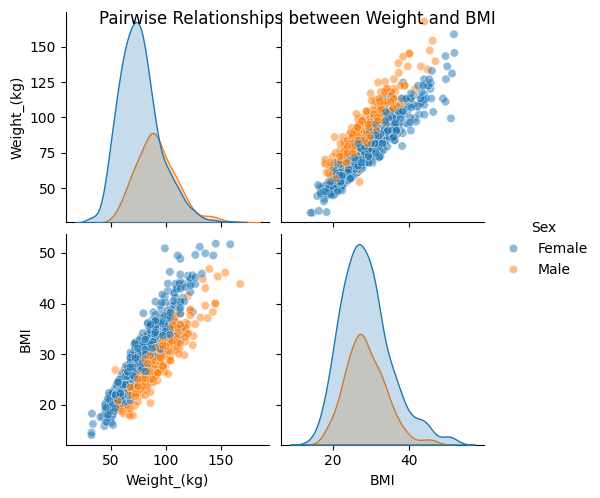

In [33]:
sns.pairplot(data, vars=['Weight_(kg)', 'BMI'], diag_kind='kde', markers='o', hue='Sex', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships between Weight and BMI')
plt.show()


#### Correlation Matrix

Correlation matrix shows how two variables are related to each other.Here we can see that weight is positively correlated with BMI.

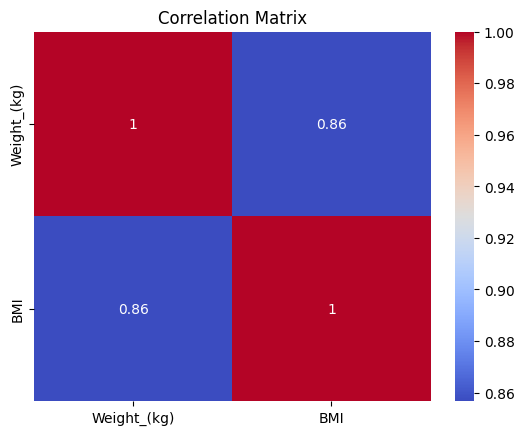

In [34]:
# Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## E. Hypothesis Testing


### Hypothesis 1:

- Null Hypothesis (H0): There is no significant difference in weight between genders.

- Alternative Hypothesis (H1): There is a significant difference in weight between genders.

These hypotheses are what we aim to test using statistical methods like the t-test. The conclusion from the hypothesis testing process will either lead to rejecting the null hypothesis in favor of the alternative hypothesis or failing to reject the null hypothesis.






In [35]:
from scipy.stats import ttest_ind

# Example: Testing if there's a significant difference in weight between genders
t_stat, p_val = ttest_ind(data[data['Sex'] == 'Female']['Weight_(kg)'],
                          data[data['Sex'] == 'Male']['Weight_(kg)'])

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in weight between genders.")
else:
    print("There is no significant difference in weight between genders.")


t-statistic: -12.274583549419338
p-value: 2.3559634167330028e-32
There is a significant difference in weight between genders.


### Hypothesis 2:

- Null Hypothesis (H0): There is no significant difference in BMI between individuals with heart disease and those without heart disease.
- Alternative Hypothesis (H1): There is a significant difference in BMI between individuals with heart disease and those without heart disease.

- Statistical Test: Independent samples t-test

In [36]:
# Example: Testing if there's a significant difference in BMI between individuals with heart disease and those without heart disease
t_stat, p_val = ttest_ind(data[data['Heart_Disease'] == 'Yes']['BMI'],
                          data[data['Heart_Disease'] == 'No']['BMI'])

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in BMI between individuals with heart disease and those without heart disease.")
else:
    print("There is no significant difference in BMI between individuals with heart disease and those without heart disease.")


t-statistic: 0.69138915562725
p-value: 0.4894819724004392
There is no significant difference in BMI between individuals with heart disease and those without heart disease.


### Hypothesis 3:

- Null Hypothesis (H0): There is no association between smoking history and the prevalence of diabetes.
- Alternative Hypothesis (H1): There is an association between smoking history and the prevalence of diabetes.

- Statistical Test: Chi-square test for independence

In [37]:
from scipy.stats import chi2_contingency

# Example: Testing for association between smoking history and prevalence of diabetes
contingency_table = pd.crosstab(data['Smoking_History'], data['Diabetes'])

chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("There is an association between smoking history and the prevalence of diabetes.")
else:
    print("There is no association between smoking history and the prevalence of diabetes.")


Chi-squared statistic: 0.21068114283950973
p-value: 0.6462340543409835
There is no association between smoking history and the prevalence of diabetes.


## F. Advanced Analysis:

<font size="5">Model Building and Analysis</font>


We will be applying various classification models to predict the presence of heart disease in patients. Accuracy, precision, recall, and F1 score are common metrics used to evaluate the performance of these classification models.

**1.Accuracy:**
   - Accuracy measures the proportion of correctly classified instances out of all instances.
   - Formula: (TP + TN) / (TP + TN + FP + FN)
   - Interpretation: It tells you how often your classifier is correct. A high accuracy indicates that the model is making correct predictions overall.

**2.Precision:**
   - Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
   - Formula: TP / (TP + FP)
   - Interpretation: It tells you how many of the instances predicted as positive are actually positive. A high precision means that the model is not labeling too many instances as positive when they are negative.

**3.Recall (Sensitivity):**
   - Recall measures the proportion of true positive predictions out of all actual positive instances.
   - Formula: TP / (TP + FN)
   - Interpretation: It tells you how many of the actual positive instances your model is capturing. A high recall means that the model is able to correctly identify most of the positive instances.

**4.F1 Score:**
   - The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
   - Formula: 2 * (precision * recall) / (precision + recall)
   - Interpretation: It combines precision and recall into a single metric. A high F1 score indicates both high precision and high recall, making it a good overall measure of a classifier's performance.



<font size="4"><center><b>Logistic Regression</b></center></font>

In [38]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[177   3]
 [ 15   5]]


In [40]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.91
Precision:  0.625
Recall:  0.25
F1 score:  0.35714285714285715


<font size="4"><center><b>Random Forest</b></center></font>

In [41]:
#apply random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[174   6]
 [ 19   1]]


In [43]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.875
Precision:  0.14285714285714285
Recall:  0.05
F1 score:  0.07407407407407408


<font size="4"><center><b>k-nearest neighbor</b></center></font>

In [44]:
#k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[168  12]
 [ 18   2]]


In [46]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.85
Precision:  0.14285714285714285
Recall:  0.1
F1 score:  0.11764705882352941


<font size="4"><center><b>Decision Tree</b></center></font>

In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [48]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[168  12]
 [ 16   4]]


In [49]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.86
Precision:  0.25
Recall:  0.2
F1 score:  0.22222222222222224


<font size="4"><center><b>Naive Bayes</b></center></font>

In [50]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[153  27]
 [ 10  10]]


In [52]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.815
Precision:  0.2702702702702703
Recall:  0.5
F1 score:  0.3508771929824562


<font size="4"><center><b>Support Vector Machine</b></center></font>

In [53]:
#support vector machine with sigmoid kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [54]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[176   4]
 [ 15   5]]


In [55]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.905
Precision:  0.5555555555555556
Recall:  0.25
F1 score:  0.3448275862068966


In [56]:
#SVM with rbf kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [57]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[176   4]
 [ 20   0]]


In [58]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.88
Precision:  0.0
Recall:  0.0
F1 score:  0.0


<font size="4"><center><b>LightGBM</b></center></font>

In [59]:
#lightgbm
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

[LightGBM] [Info] Number of positive: 121, number of negative: 678
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151439 -> initscore=-1.723357
[LightGBM] [Info] Start training from score -1.723357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[175   5]
 [ 18   2]]


In [61]:
#accuracy, precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.885
Precision:  0.2857142857142857
Recall:  0.1
F1 score:  0.14814814814814817


### Summary and Insights

- Accuracy: Logistic Regression (0.91) and SVM with Sigmoid Kernel (0.905) have the highest accuracy.
- Precision: Logistic Regression (0.625) and SVM with Sigmoid Kernel (0.5556) show higher precision compared to others.
- Recall: Naive Bayes (0.5) outperforms others significantly in recall but with a lower precision and accuracy.
- F1 Score: Logistic Regression (0.3571) and Naive Bayes (0.3509) provide a balanced performance between precision and recall.
Each algorithm has its strengths and trade-offs. For instance, Logistic Regression and SVM with Sigmoid Kernel show high accuracy and precision but have moderate recall. Naive Bayes, although less accurate overall, has a high recall, making it better at identifying the positive class but at the cost of precision.

### Recommendations

- If the cost of false negatives is high, consider using Naive Bayes due to its high recall.
- For a balanced approach with good overall performance, Logistic Regression or SVM with Sigmoid Kernel can be good choices.
- Further tuning and cross-validation can help in optimizing these models for better performance.